#### Author : Charaf ZGUIOUAR

# Load up the data 

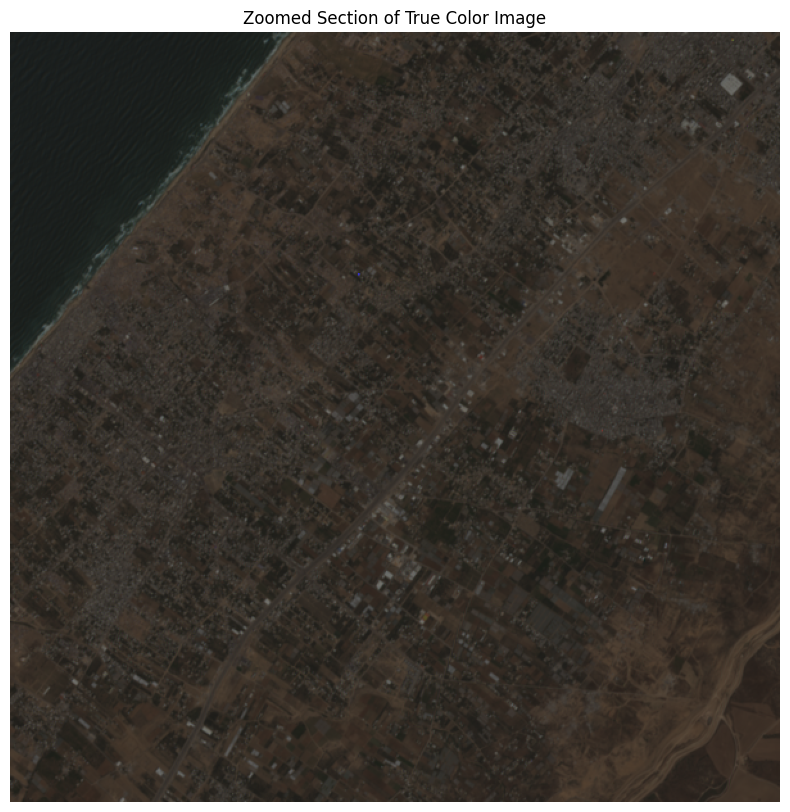

In [109]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def read_band(path):
    with rasterio.open(path) as src:
        return src.read(1)  # Read the first (and only) band

# Paths to the band files (adjust the paths as necessary)
band_4_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R10m/T36RXV_20240504T081611_B04_10m.jp2'  # Red
band_3_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R10m/T36RXV_20240504T081611_B03_10m.jp2'  # Green
band_2_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R10m/T36RXV_20240504T081611_B02_10m.jp2'  # Blue


def read_band(path, window):
    with rasterio.open(path) as src:
        # Ensure the window is within the image bounds
        if window.col_off + window.width > src.width or window.row_off + window.height > src.height:
            raise ValueError("Requested window is out of bounds of the image dimensions.")
        return src.read(1, window=window)  # Read the specified window from the first band

# Define the window (col_off, row_off, width, height)
zoom_window = rasterio.windows.Window(2700, 2000, 600, 600)  # Adjust these values based on your area of interest

# Read the bands
red = read_band(band_4_path, zoom_window)
green = read_band(band_3_path, zoom_window)
blue = read_band(band_2_path, zoom_window)

# Stack bands along the third dimension
rgb = np.stack((red, green, blue), axis=-1)

# Normalize the bands for better visualization
rgb_normalized = rgb.astype(float) / rgb.max()

# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(rgb_normalized)
plt.title('Zoomed Section of True Color Image')
plt.axis('off')  # Hide axis
plt.show()



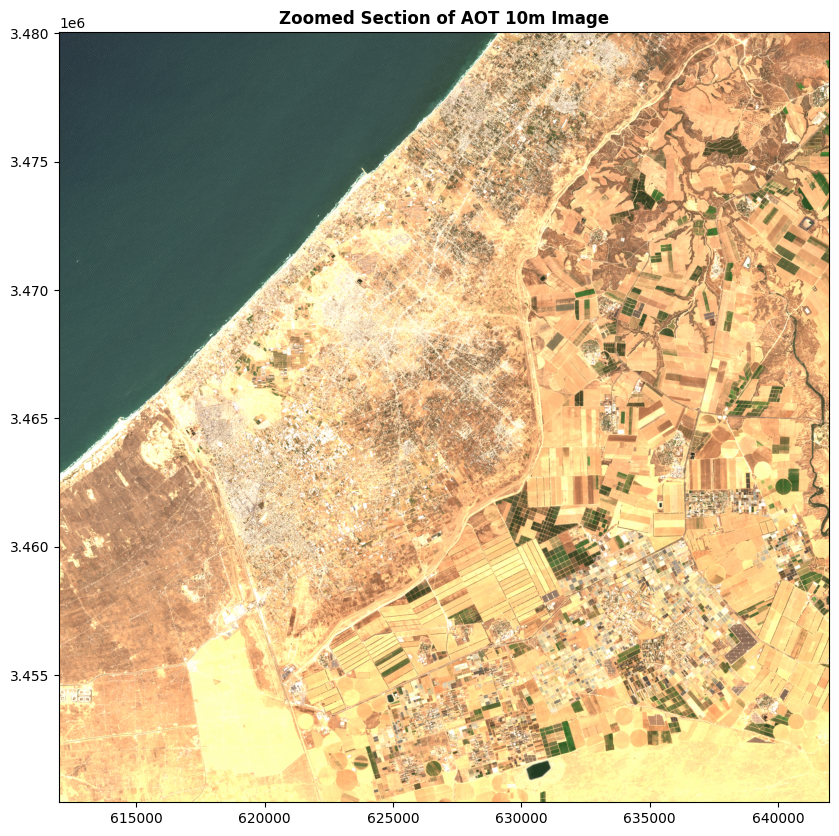

In [132]:
band_2_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R10m/T36RXV_20240504T081611_TCI_10m.jp2'  # Blue

zoom_window = rasterio.windows.Window(1200, 2000, 3000,3000) # Adjust these values based on your area of interest

# Open the raster file
with rasterio.open(band_2_path) as src:
    # Read the data from the defined window
    window_data = src.read(window=zoom_window)
    
    # Display the zoomed section using matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 10))  # You can adjust the figure size as needed
    show(window_data, ax=ax, transform=src.window_transform(zoom_window), title='Zoomed Section of AOT 10m Image')
    plt.show()

# Visualize the other bands at 10 meters depth

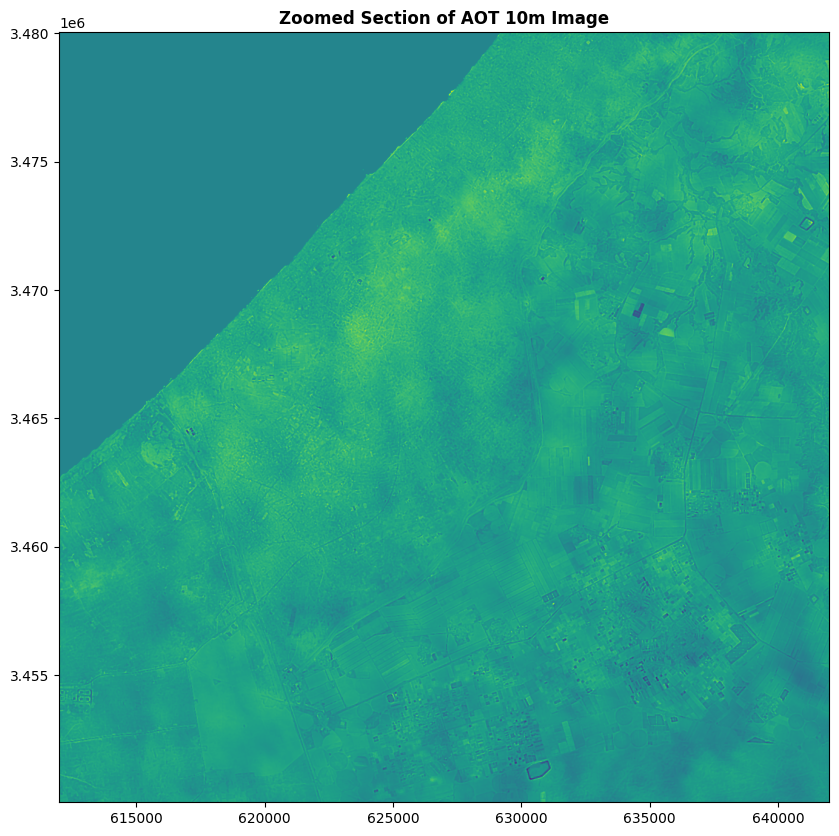

In [75]:
file_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R10m/T36RXV_20240504T081611_WVP_10m.jp2'

zoom_window = rasterio.windows.Window(1200, 2000, 3000,3000) # Adjust these values based on your area of interest

# Open the raster file
with rasterio.open(file_path) as src:
    # Read the data from the defined window
    window_data = src.read(window=zoom_window)
    
    # Display the zoomed section using matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 10))  # You can adjust the figure size as needed
    show(window_data, ax=ax, transform=src.window_transform(zoom_window), title='Zoomed Section of AOT 10m Image')
    plt.show()

# Visualize the other bands at 20 meters depth

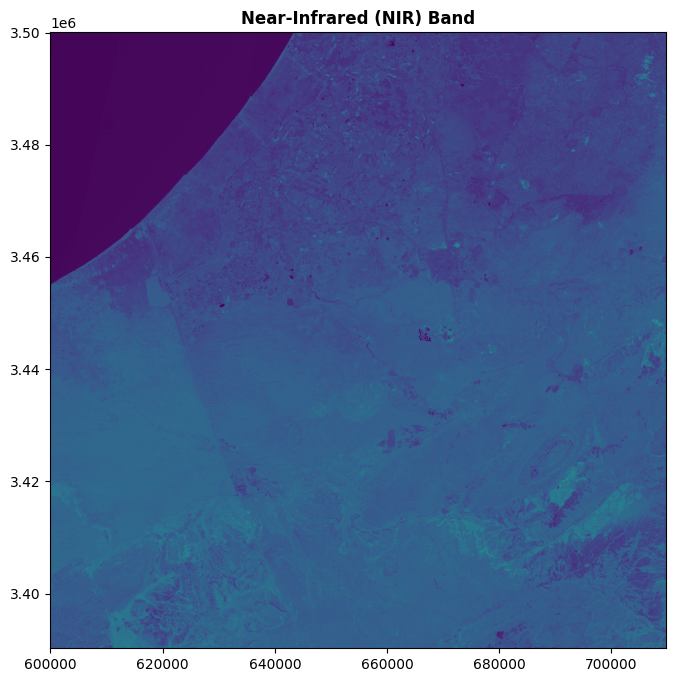

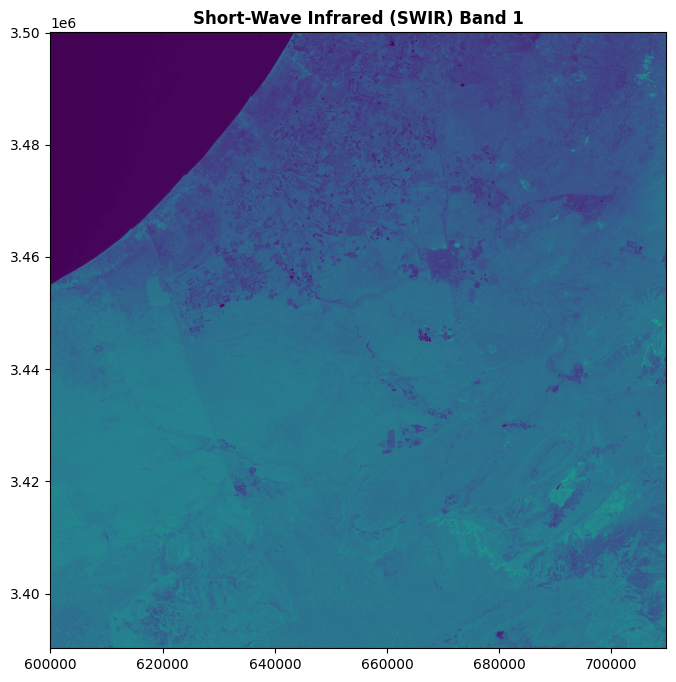

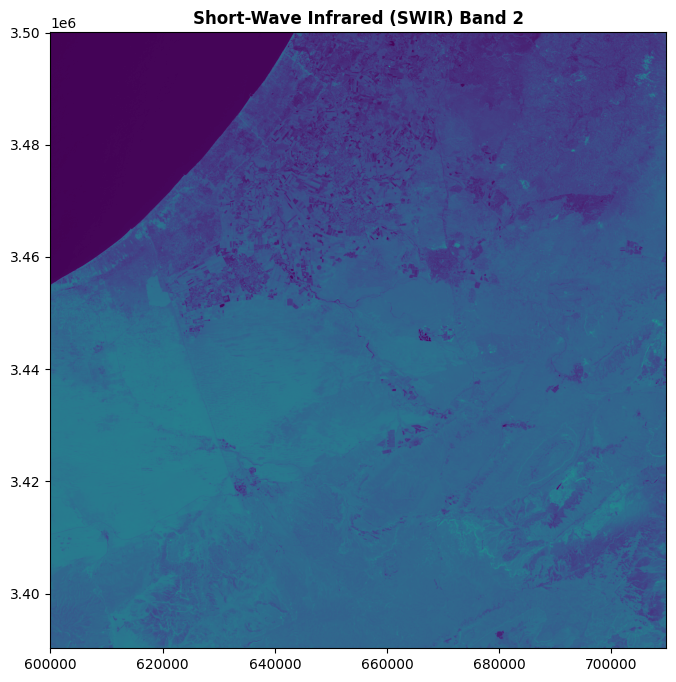

<closed DatasetReader name='data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R20m/T36RXV_20240504T081611_B12_20m.jp2' mode='r'>

In [80]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

def open_and_show_band(file_path, title):
    """Open a band file and display it using matplotlib."""
    with rasterio.open(file_path) as src:
        fig, ax = plt.subplots(figsize=(8, 8))
        show(src, ax=ax, title=title)
        plt.show()
    return src

# Replace these paths with the paths to your actual JP2 files
nir_band_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R20m/T36RXV_20240504T081611_B07_20m.jp2'  # Near-Infrared
swir1_band_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R20m/T36RXV_20240504T081611_B11_20m.jp2'  # Short-Wave Infrared 1
swir2_band_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R20m/T36RXV_20240504T081611_B12_20m.jp2'  # Short-Wave Infrared 2

# Display NIR band
nir =open_and_show_band(nir_band_path, "Near-Infrared (NIR) Band")

# Display SWIR band 1
open_and_show_band(swir1_band_path, "Short-Wave Infrared (SWIR) Band 1")

# Display SWIR band 2
open_and_show_band(swir2_band_path, "Short-Wave Infrared (SWIR) Band 2")


# Build a damage indicator out of NIR and SWIR at 60 meters

# Build a damage indicator out of NIR and SWIR at 10 meters

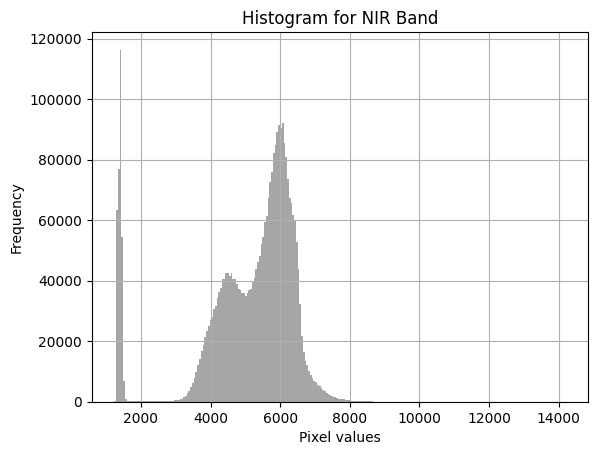

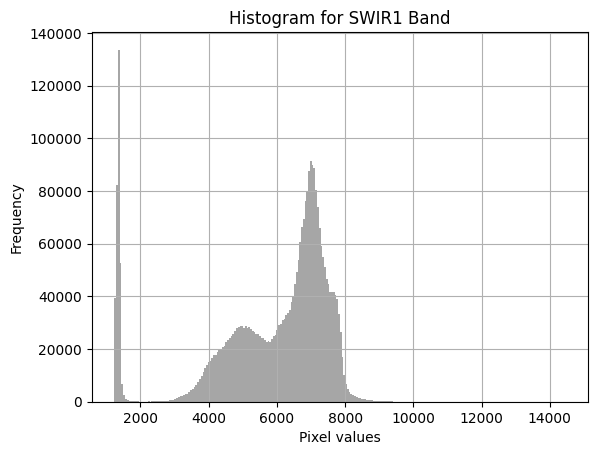

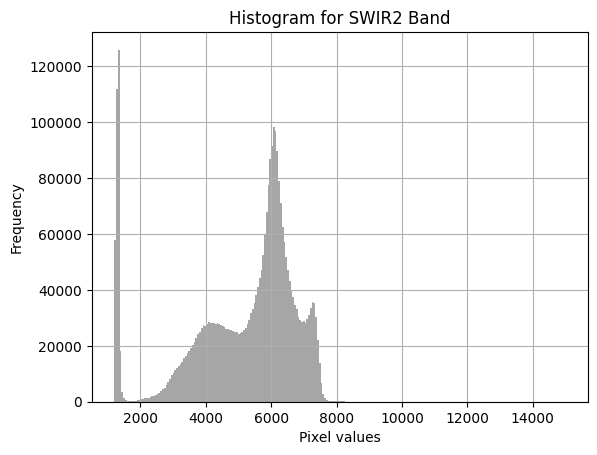

In [108]:
nir_band_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R60m/T36RXV_20240504T081611_B8A_60m.jp2'  # Near-Infrared
swir1_band_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R60m/T36RXV_20240504T081611_B11_60m.jp2'  # Short-Wave Infrared 1
swir2_band_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R60m/T36RXV_20240504T081611_B12_60m.jp2'  # Short-Wave Infrared 2

def plot_histogram(band_path, title):
    with rasterio.open(band_path) as src:
        data = src.read(1)  # Read the first band
        plt.figure()
        plt.hist(data.flatten(), bins=256, color='gray', alpha=0.7)
        plt.title(title)
        plt.xlabel('Pixel values')
        plt.ylabel('Frequency')
        plt.grid(True)

 

# Plot histograms
plot_histogram(nir_band_path, 'Histogram for NIR Band')
plot_histogram(swir1_band_path, 'Histogram for SWIR1 Band')
plot_histogram(swir2_band_path, 'Histogram for SWIR2 Band')

plt.show()


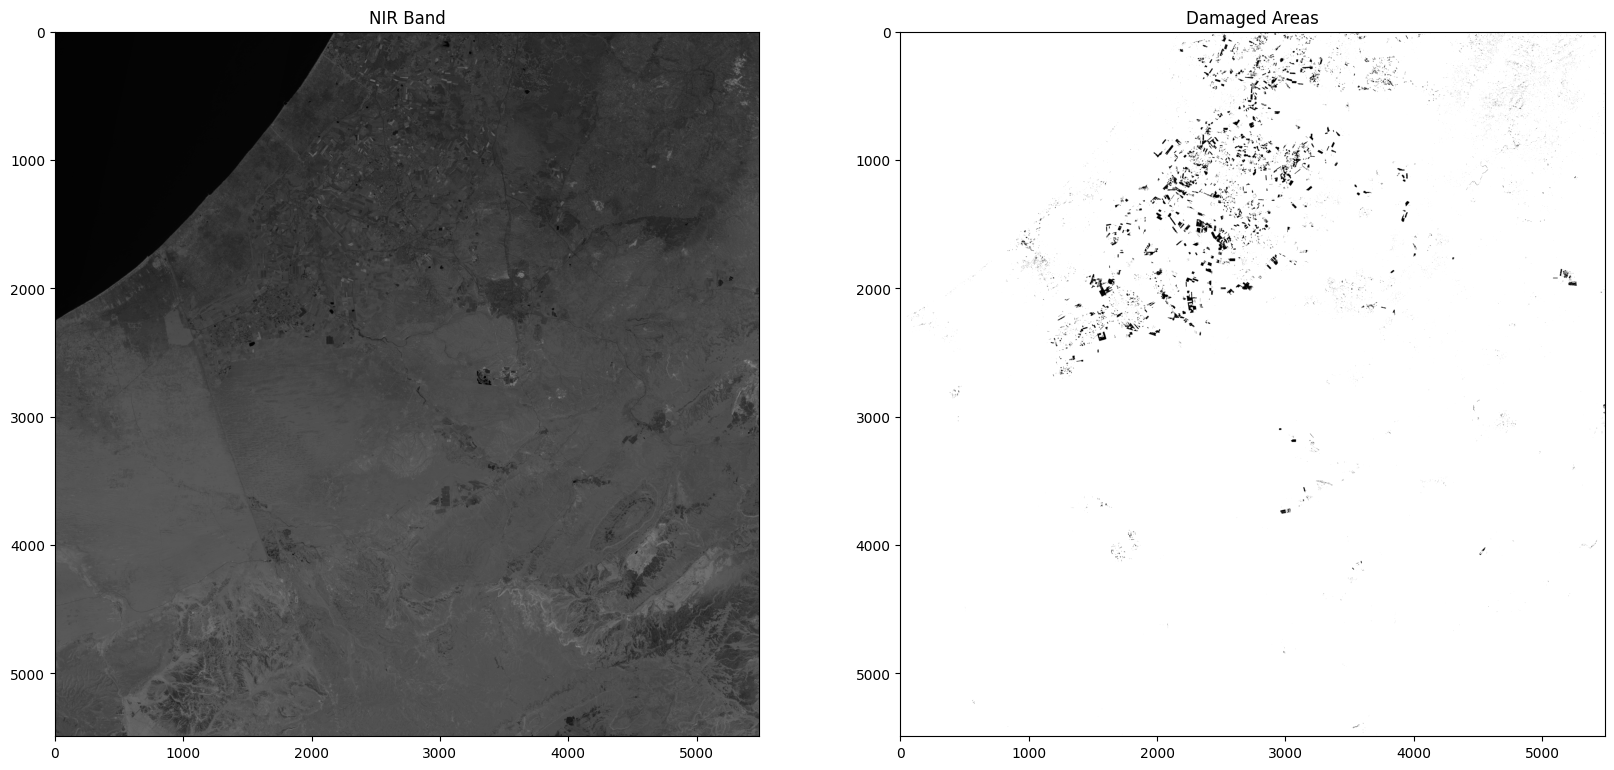

In [134]:

def read_band(path):
    with rasterio.open(path) as src:
        return src.read(1)
nir = read_band(nir_band_path)
swir1 = read_band(swir1_band_path)
swir2 = read_band(swir2_band_path)
stacked = np.dstack((nir, swir1, swir2))

# Example threshold values to identify damaged areas
# These thresholds will need to be determined based on your specific application and data analysis
nir_threshold = 5000
swir1_threshold = 5000
swir2_threshold = 5000

# Damage classification based on simple thresholding logic
# Adjust thresholds based on the histogram or specific analysis of your data
damaged = np.logical_or(nir < nir_threshold, np.logical_or(swir1 > swir1_threshold, swir2 > swir2_threshold))

# Plotting results
fig, ax = plt.subplots(1, 2, figsize=(20, 18))
ax[0].imshow(stacked[:, :, 0], cmap='gray')  # Display NIR band for reference
ax[0].set_title('NIR Band')
ax[1].imshow(damaged,cmap='gray')  # Display classified damaged areas
ax[1].set_title('Damaged Areas')
plt.show()

# Build a damage indicator out of NIR and SWIR at 20 meters

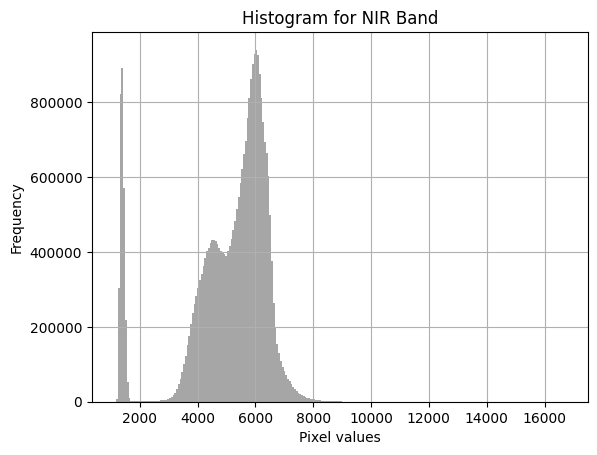

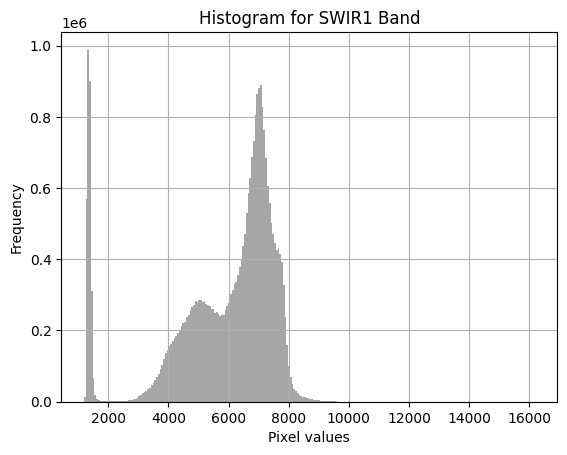

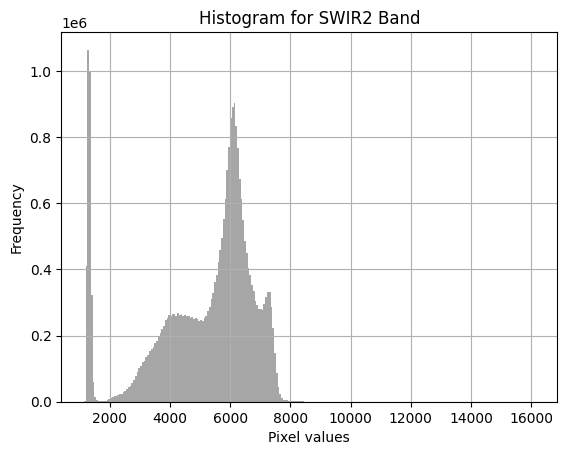

In [124]:
nir_band_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R20m/T36RXV_20240504T081611_B8A_20m.jp2'  # Near-Infrared
swir1_band_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R20m/T36RXV_20240504T081611_B11_20m.jp2'  # Short-Wave Infrared 1
swir2_band_path = 'data/GRANULE/L2A_T36RXV_A046307_20240504T083015/IMG_DATA/R20m/T36RXV_20240504T081611_B12_20m.jp2'  # Short-Wave Infrared 2

def plot_histogram(band_path, title):
    with rasterio.open(band_path) as src:
        data = src.read(1)  # Read the first band
        plt.figure()
        plt.hist(data.flatten(), bins=256, color='gray', alpha=0.7)
        plt.title(title)
        plt.xlabel('Pixel values')
        plt.ylabel('Frequency')
        plt.grid(True)

 

# Plot histograms
plot_histogram(nir_band_path, 'Histogram for NIR Band')
plot_histogram(swir1_band_path, 'Histogram for SWIR1 Band')
plot_histogram(swir2_band_path, 'Histogram for SWIR2 Band')

plt.show()


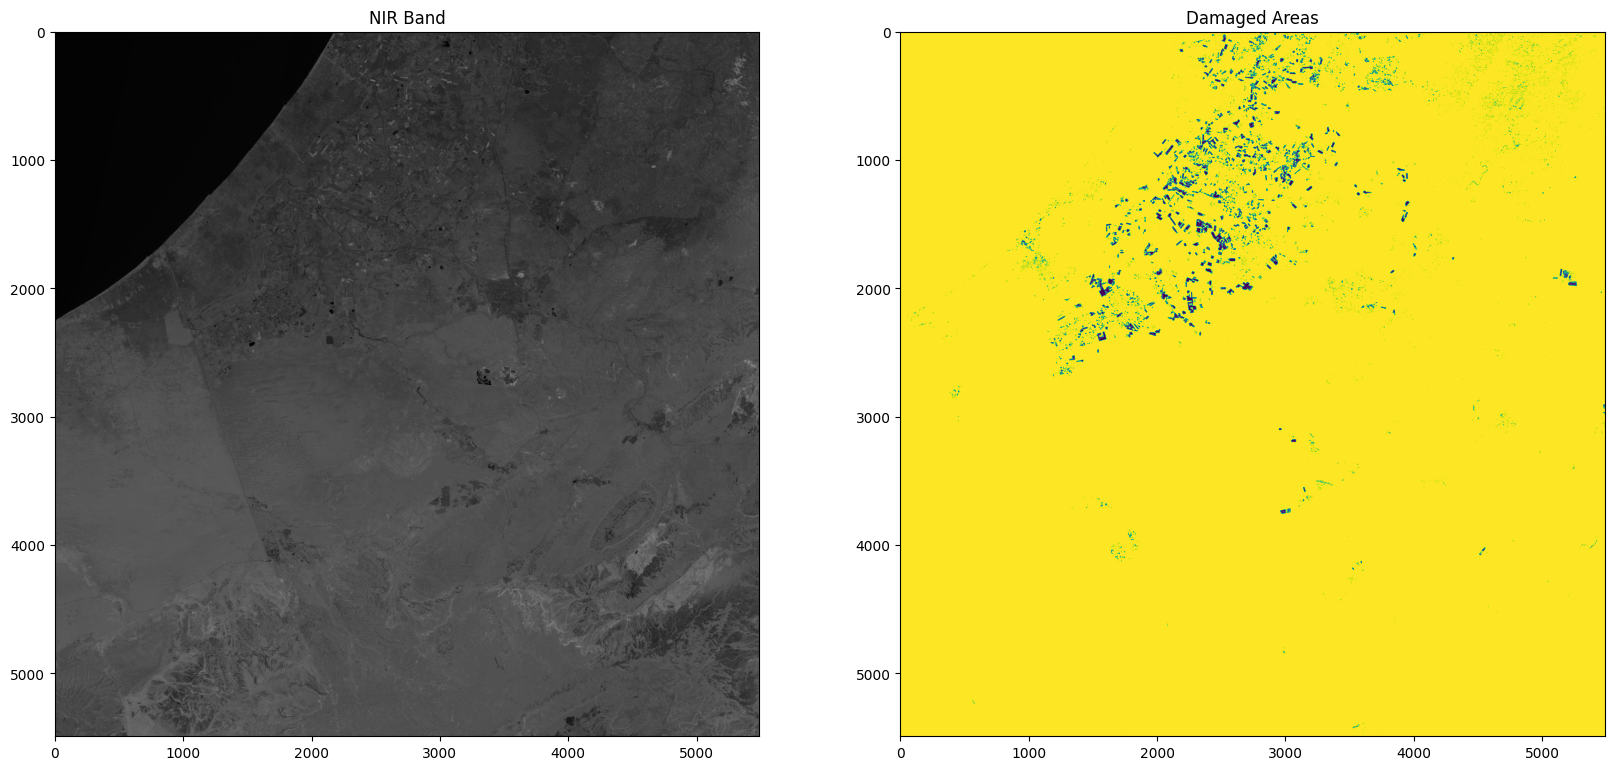

In [126]:
def read_band(path):
    with rasterio.open(path) as src:
        return src.read(1)
nir = read_band(nir_band_path)
swir1 = read_band(swir1_band_path)
swir2 = read_band(swir2_band_path)
stacked = np.dstack((nir, swir1, swir2))

# Example threshold values to identify damaged areas
# These thresholds will need to be determined based on your specific application and data analysis
nir_threshold = 5000
swir1_threshold = 5000
swir2_threshold = 5000

# Damage classification based on simple thresholding logic
# Adjust thresholds based on the histogram or specific analysis of your data
damaged = np.logical_or(nir < nir_threshold, np.logical_or(swir1 > swir1_threshold, swir2 > swir2_threshold))

# Plotting results
fig, ax = plt.subplots(1, 2, figsize=(20, 18))
ax[0].imshow(stacked[:, :, 0], cmap='gray')  # Display NIR band for reference
ax[0].set_title('NIR Band')
ax[1].imshow(damaged)  # Display classified damaged areas
ax[1].set_title('Damaged Areas')
plt.show()

The Normalized Difference Built-up Index (NDBI) is used to emphasize urban areas in satellite images by making use of the unique spectral signatures of urban materials, such as concrete and asphalt, which reflect light differently compared to natural surfaces. Here's a detailed look at the equation and an explanation of how it works:

### NDBI Equation
The NDBI is calculated using the following formula
$$
\text{NDBI} = \frac{(\text{SWIR} - \text{NIR})}{(\text{SWIR} + \text{NIR})}
$$

where:
- **SWIR**: Pixel values from the Short-Wave Infraredrt-Wave Infrared band.
- **NIR** stands for the pixel values from a Near-Infrared band.

### Explanation of the Equation
1. **Difference in Reflectance**: The NDBI takes the difference between the reflectance measurements in the SWIR and NIR bands. Urban materials, which are prevalent in built-up areas, generally have higher reflectance in the SWIR band compared to the NIR band. This is due to their thermal properties and the way these materials absorb and reflect solar radiation.
   
2. **Normalization**: This difference is then normalized by the sum of the reflectances in the SWIR and NIR bands. Normalization helps to scale the index to a range between -1 and 1, making it easier to compare across different images and conditions. This step mitigates variations in lighting, atmospheric conditions, and sur environmental management.

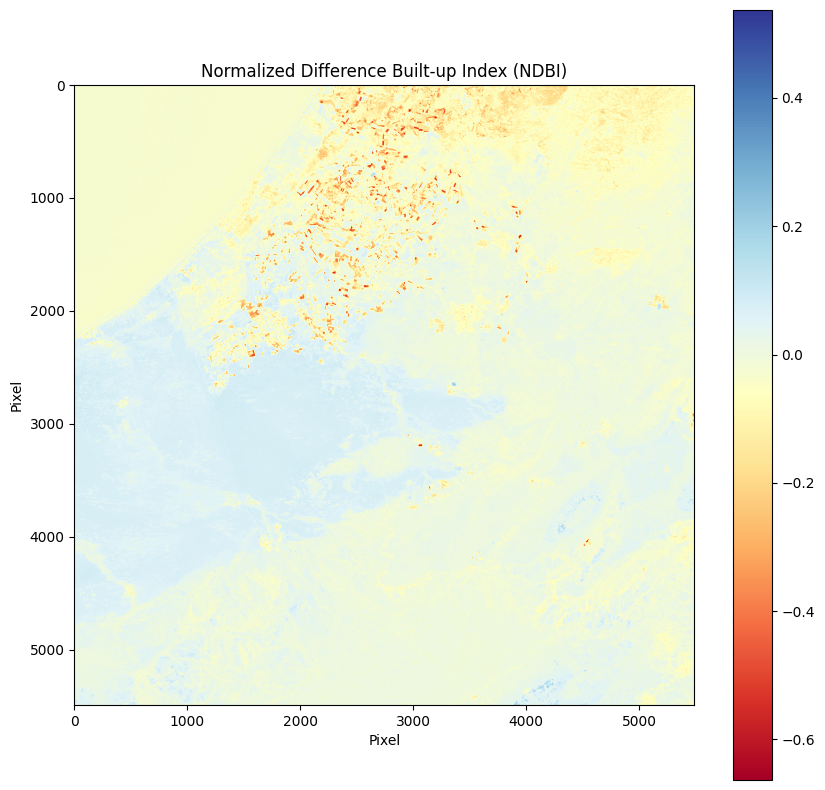

In [131]:
def calculate_ndbi(nir_path, swir_path):
    with rasterio.open(nir_path) as nir_src, rasterio.open(swir_path) as swir_src:
        # Read the bands
        nir = nir_src.read(1).astype(float)
        swir = swir_src.read(1).astype(float)

        # Calculate NDBI
        ndbi = (swir - nir) / (swir + nir)

        # Handle divide by zero
        ndbi[np.isnan(ndbi)] = 0

        return ndbi


# Calculate NDBI
ndbi_image = calculate_ndbi(nir_band_path, swir2_band_path)

# Visualization
plt.figure(figsize=(10, 10))
plt.imshow(ndbi_image, cmap='RdYlBu')
plt.colorbar()
plt.title('Normalized Difference Built-up Index (NDBI)')
plt.xlabel('Pixel')
plt.ylabel('Pixel')
plt.show()


### Practical Implications of the NDBI
- **Positive Values Indicate Urban Areas**: In general, higher positive values of NDBI are indicative of built-up areas. This is because built-up surfaces reflect more in the SWIR than in the NIR.
- **Negative Values Suggest Vegetation**: Lower or negative values typically suggest non-built-up areas, primarily vegetation, as vegetation reflects more in the NIR than in the SWIR.
- **Close to Zero or Negative**: Water bodies and bare soil might also show values close to zero or slightly negative, as their reflectance profiles in these bands can be similar.
m
### Usage of NDBI
- **Urban Planning and Management**: Planners and developers use NDBI to monitor urban growth, plan urban infrastructure, and manage urban sprawl.
- **Environmental Impact Assessments**: Understanding the extent of built-up areas helps in assessing the impact of urbanization on natural habitats, water runoff, and local climate conditions.
- **Disaster Response**: After events such as earthquakes or hurricanes, NDBI can help in quickly assessing damage to built-up areas.

The NDBI is a straightforward yet powerful tool for distinguishing urban surfaces in satellite imagery, facilitating a wide range of applications from urban planning to environmental management.